<a href="https://colab.research.google.com/github/Takouabelwafa/Machine_Learning/blob/main/Task2ClassificationDeChiffresManuscrits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK2:TASK 2 — SVM pour la classification de chiffres manuscrits

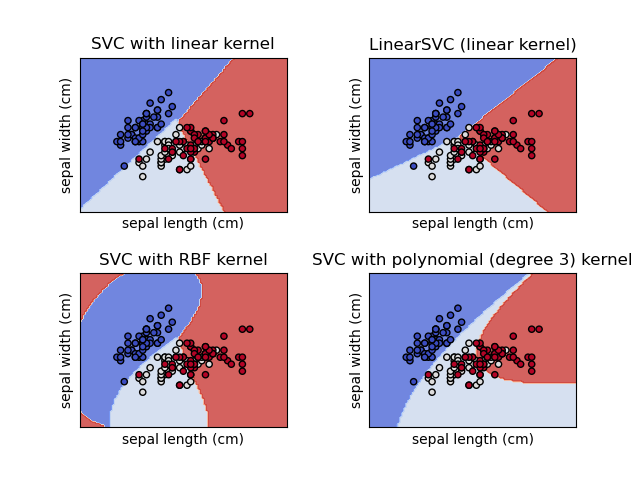

# Chargement et exploration du dataset

In [ ]:
from sklearn.datasets import load_digits
#import libraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Charger le dataset digits
digits = load_digits()





In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
#Afficher le contenue de chaque colonne
for i in digits.keys():
    print(i," \n")
    print(digits[i])

data  

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
target  

[0 1 2 ... 8 9 8]
frame  

None
feature_names  

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0',

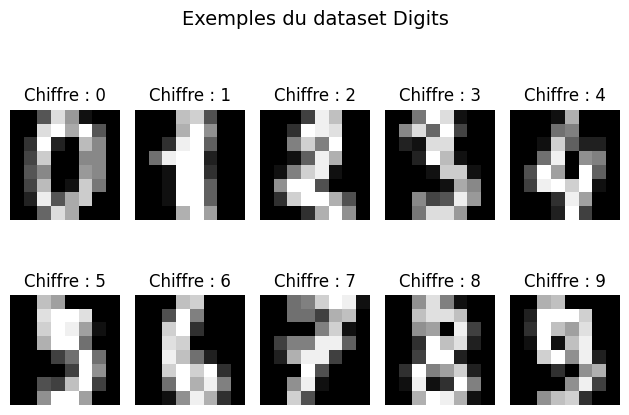

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 lignes, 5 colonnes
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Chiffre : {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Exemples du dataset Digits", fontsize=14)
plt.tight_layout()
plt.show()

# •Réduire la dimension avec PCA


In [ ]:
from sklearn.decomposition import PCA
#nbr de nombre de 0,9
pca = PCA(n_components=10)
pca.fit(digits['data'])

PCA(n_components=10)

# •Comparer kernel linéaire, RBF, poly


In [ ]:
# •Comparer kernel linéaire, RBF, poly
from sklearn.preprocessing import StandardScaler
kernel_SVM = ['linear', 'rbf', 'poly']
confusion = []
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kernel_SVM = ['linear', 'rbf', 'poly']
confusion = []
for kernel in kernel_SVM:
    # Séparer train/test
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)
    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Créer et entraîner le modèle
    model = SVC(kernel=kernel, gamma='scale')
    model.fit(X_train_scaled, y_train)
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    # Évaluation
    print(f"Kernel: {kernel:7s} | Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    # Stocker la matrice de confusion
    confusion.append(confusion_matrix(y_test, y_pred))




Kernel: linear  | Accuracy: 0.9778
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Kernel: rbf     | Accuracy: 0.9822
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
        

✅ **On constate que les SVM avec kernel polynomial et RBF fournissent des résultats légèrement meilleurs que le SVM linéaire**

# Afficher les matrice avec sns

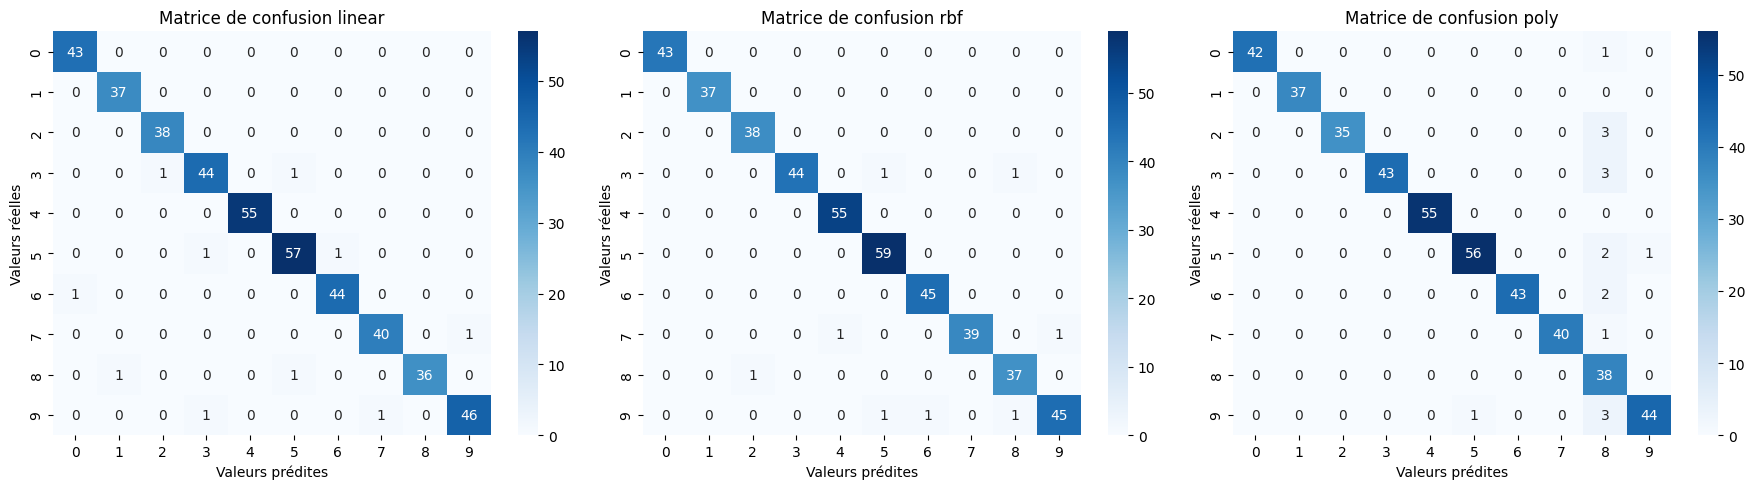

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 ligne, 3 colonnes

for i, ax in enumerate(axes):
    sns.heatmap(confusion[i], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Valeurs prédites')
    ax.set_ylabel('Valeurs réelles')
    ax.set_title(f'Matrice de confusion {kernel_SVM[i]}')

plt.tight_layout()
plt.show()

✅ **Ici,  la matrice de confusion montre que le SVM avec kernel rbf donner les meilleur résultat**

# •Tester la scalabilité (temps d'entraînement)


# •Visualiser les marges et erreurs

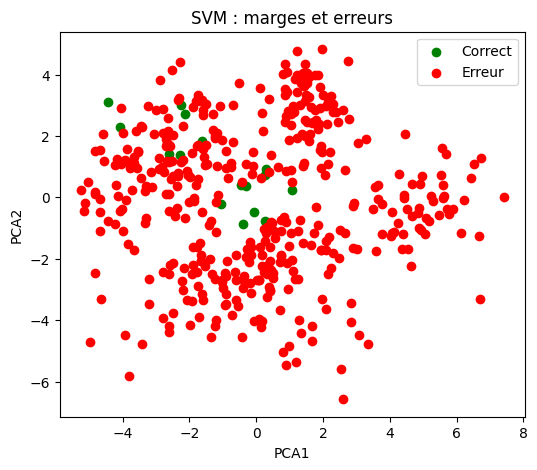

In [ ]:
# •Visualiser les marges et erreurs
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Réduire à 2D
X_train_2d = PCA(n_components=2).fit_transform(X_train_scaled)
X_test_2d = PCA(n_components=2).fit_transform(X_test_scaled)

# SVM  rbg
model = SVC(kernel='rbf')
model.fit(X_train_2d, y_train)
y_pred = model.predict(X_test_2d)

# Tracer les points
plt.figure(figsize=(6,5))
# Corrects
plt.scatter(X_test_2d[y_test==y_pred,0], X_test_2d[y_test==y_pred,1], c='green', label='Correct')
# Erreurs
plt.scatter(X_test_2d[y_test!=y_pred,0], X_test_2d[y_test!=y_pred,1], c='red', label='Erreur')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM : marges et erreurs')
plt.legend()
plt.show()


